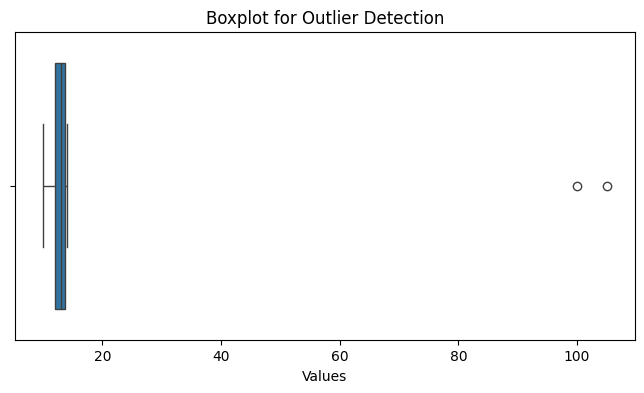

    Values   Z_score  Zscore_Outlier  IQR_Outlier
0       10  0.484436           False        False
1       12  0.421052           False        False
2       12  0.421052           False        False
3       13  0.389360           False        False
4       12  0.421052           False        False
5       14  0.357668           False        False
6       13  0.389360           False        False
7      100  2.367849           False         True
8      105  2.526310           False         True
9       12  0.421052           False        False
10      13  0.389360           False        False
11      14  0.357668           False        False
12      11  0.452744           False        False
13      13  0.389360           False        False

Number of outliers detected:
Z-score method: 0
IQR method: 2


In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Sample dataset with outliers
data = {
    'Values': [10, 12, 12, 13, 12, 14, 13, 100, 105, 12, 13, 14, 11, 13]
}
df = pd.DataFrame(data)

# 1. Z-score method
df['Z_score'] = np.abs(stats.zscore(df['Values']))
zscore_outliers = df['Z_score'] > 3

# 2. IQR method
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = (df['Values'] < lower_bound) | (df['Values'] > upper_bound)

# 3. Boxplot method (same as IQR, but let's visualize)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Values'])
plt.title('Boxplot for Outlier Detection')
plt.show()

# Add outlier flags to DataFrame for comparison
df['Zscore_Outlier'] = zscore_outliers
df['IQR_Outlier'] = iqr_outliers

print(df)

# Summary counts
print("\nNumber of outliers detected:")
print("Z-score method:", zscore_outliers.sum())
print("IQR method:", iqr_outliers.sum())
